<a href="https://colab.research.google.com/github/ally6606/Computer-Vision-Project/blob/main/ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Object Detection Using YOLO <b> </h1></center>

This tutorial is designed to provide a comprehensive understanding of how to use YOLO, a state-of-the-art method in computer vision, for detecting objects in images.

Object detection and classification is a key technology in many areas, such as automated vehicles, security, and even healthcare.

We will begin with the basics of preparing (pre processing) an image dataset, ensuring it is ready for effective model training.We will then explore how YOLO, a type of convolutional neural network, automatically extracts features from images to recognize different objects. Understanding this process is crucial for grasping how YOLO operates.

The core of this tutorial is focused on transfer learning using YOLO. We will teach you how to take a pre-trained YOLO model and adapt it to a new dataset. This technique is efficient and powerful, allowing us to harness the strengths of YOLO with less computational effort.

By the end of this tutorial, you will have hands-on experience with preparing data, implementing YOLO, and understanding the principles behind it. This tutorial aims to equip students with practical skills and knowledge in one of the most exciting fields in technology.

Since its inception, the YOLO family of object detection models has come a long way. YOLOv8 is the most recent addition to this famous anchor-based single-shot family of object detectors. It comes with a bunch of improvements which include state-of-the-art accuracy and speed.  In this article, we will be fine tuning the YOLOv8 object detection model on a real-world pothole detection dataset.

In the previous lecture, you were asked to make your own custom datasets for a project you want to work on. Today we will explore how to finetune YOLO on a certain dataset.  

Importing required Libraries

In [ ]:
!pip install tensorflow

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Dataset Description






Mushroom Images for Object Detection

available on kaggle => https://universe.roboflow.com/denis-7enby/mushrooms-yolov5/dataset/1

- 6805 images in train folder. 798 images in valid folder. 827 images in test folder.


# Custom object detection using YOLO

First install and import

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.221 🚀 Python-3.13.7 torch-2.9.0 CPU (Apple M2)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 385.5/460.4 GB disk)


In [2]:
from ultralytics import YOLO

In [3]:
import sys, platform, torch, os, subprocess

print("Python exe:", sys.executable)
print("Python ver:", sys.version)
print("Platform:", platform.platform())
print("CUDA seen by torch BEFORE reinstall:", torch.cuda.is_available() if 'torch' in globals() else 'torch not imported')


Python exe: /Library/Frameworks/Python.framework/Versions/3.13/bin/python3.13
Python ver: 3.13.7 (v3.13.7:bcee1c32211, Aug 14 2025, 19:10:51) [Clang 16.0.0 (clang-1600.0.26.6)]
Platform: macOS-12.5-arm64-arm-64bit-Mach-O
CUDA seen by torch BEFORE reinstall: False


## Training YOLO

We are going to select small pretrained (on COCO dataset) model of YOLOv8

In [4]:
model = YOLO('yolov8s.pt') # pretrained model

The detailed architecture of the model can be seen from:


In [5]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [6]:
%%writefile config.yaml
path: /Users/allycui/Desktop/SFU Fall2025/IAT 360/Group_Assignment1

train: /Users/allycui/Desktop/SFU Fall2025/IAT 360/Group_Assignment1/train/images
val: /Users/allycui/Desktop/SFU Fall2025/IAT 360/Group_Assignment1/valid/images
test: /Users/allycui/Desktop/SFU Fall2025/IAT 360/Group_Assignment1/test/images

# Classes
nc: 21 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names: [
  'Agaricus bisporus',
  'Agaricus blazei Murill',
  'Agrocybe aegerita',
  'Armillaria mellea',
  'Auricularia auricula',
  'Boletus',
  'Cantharellus cibarius',
  'Clitocybe maxima',
  'Collybia albuminosa',
  'Coprinus comatus',
  'Cordyceps militaris',
  'Dictyophora indusiate',
  'Flammulina velutiper',
  'Hericium erinaceus',
  'Hypsizygus marmoreus',
  'Lentinus edodes',
  'Morchella esculenta',
  'Pleurotus citrinopileatus',
  'Pleurotus cystidiosus',
  'Pleurotus eryngii',
  'Pleurotus ostreatus'
]

Overwriting config.yaml


Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [ ]:
model.train(data="config.yaml",epochs=15,patience=5,batch=16, lr0=0.001,imgsz=640)

Ultralytics 8.3.218  Python-3.11.0 torch-2.10.0.dev20251021+cu128 CUDA:0 (NVIDIA GeForce RTX 5070 Ti, 16303MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=config.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train19, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000022E9995DE50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104,

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.218  Python-3.11.0 torch-2.10.0.dev20251021+cu128 CUDA:0 (NVIDIA GeForce RTX 5070 Ti, 16303MiB)
Model summary (fused): 72 layers, 11,133,711 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 849.3324.8 MB/s, size: 43.6 KB)
val: Scanning C:\Users\User\Desktop\Mushrooms-yolov5.v1i.yolov8\valid\labels.cache... 798 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 798/798  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 50/50 10.8it/s 4.6s
                   all        798       1801      0.747      0.684      0.748      0.595
     Agaricus bisporus         32        105       0.78      0.705      0.791      0.674
Agaricus blazei Murill         27         66      0.581      0.485      0.519      0.364
     Agrocybe aegerita         35         43      0.726      0.677      0.642       0.54
     Armillaria mellea         39         70      0.579      0.557      0.637      0.5

np.float64(0.6843447551851147)

Showing confusion matrix, that is already stored in detect/train folder

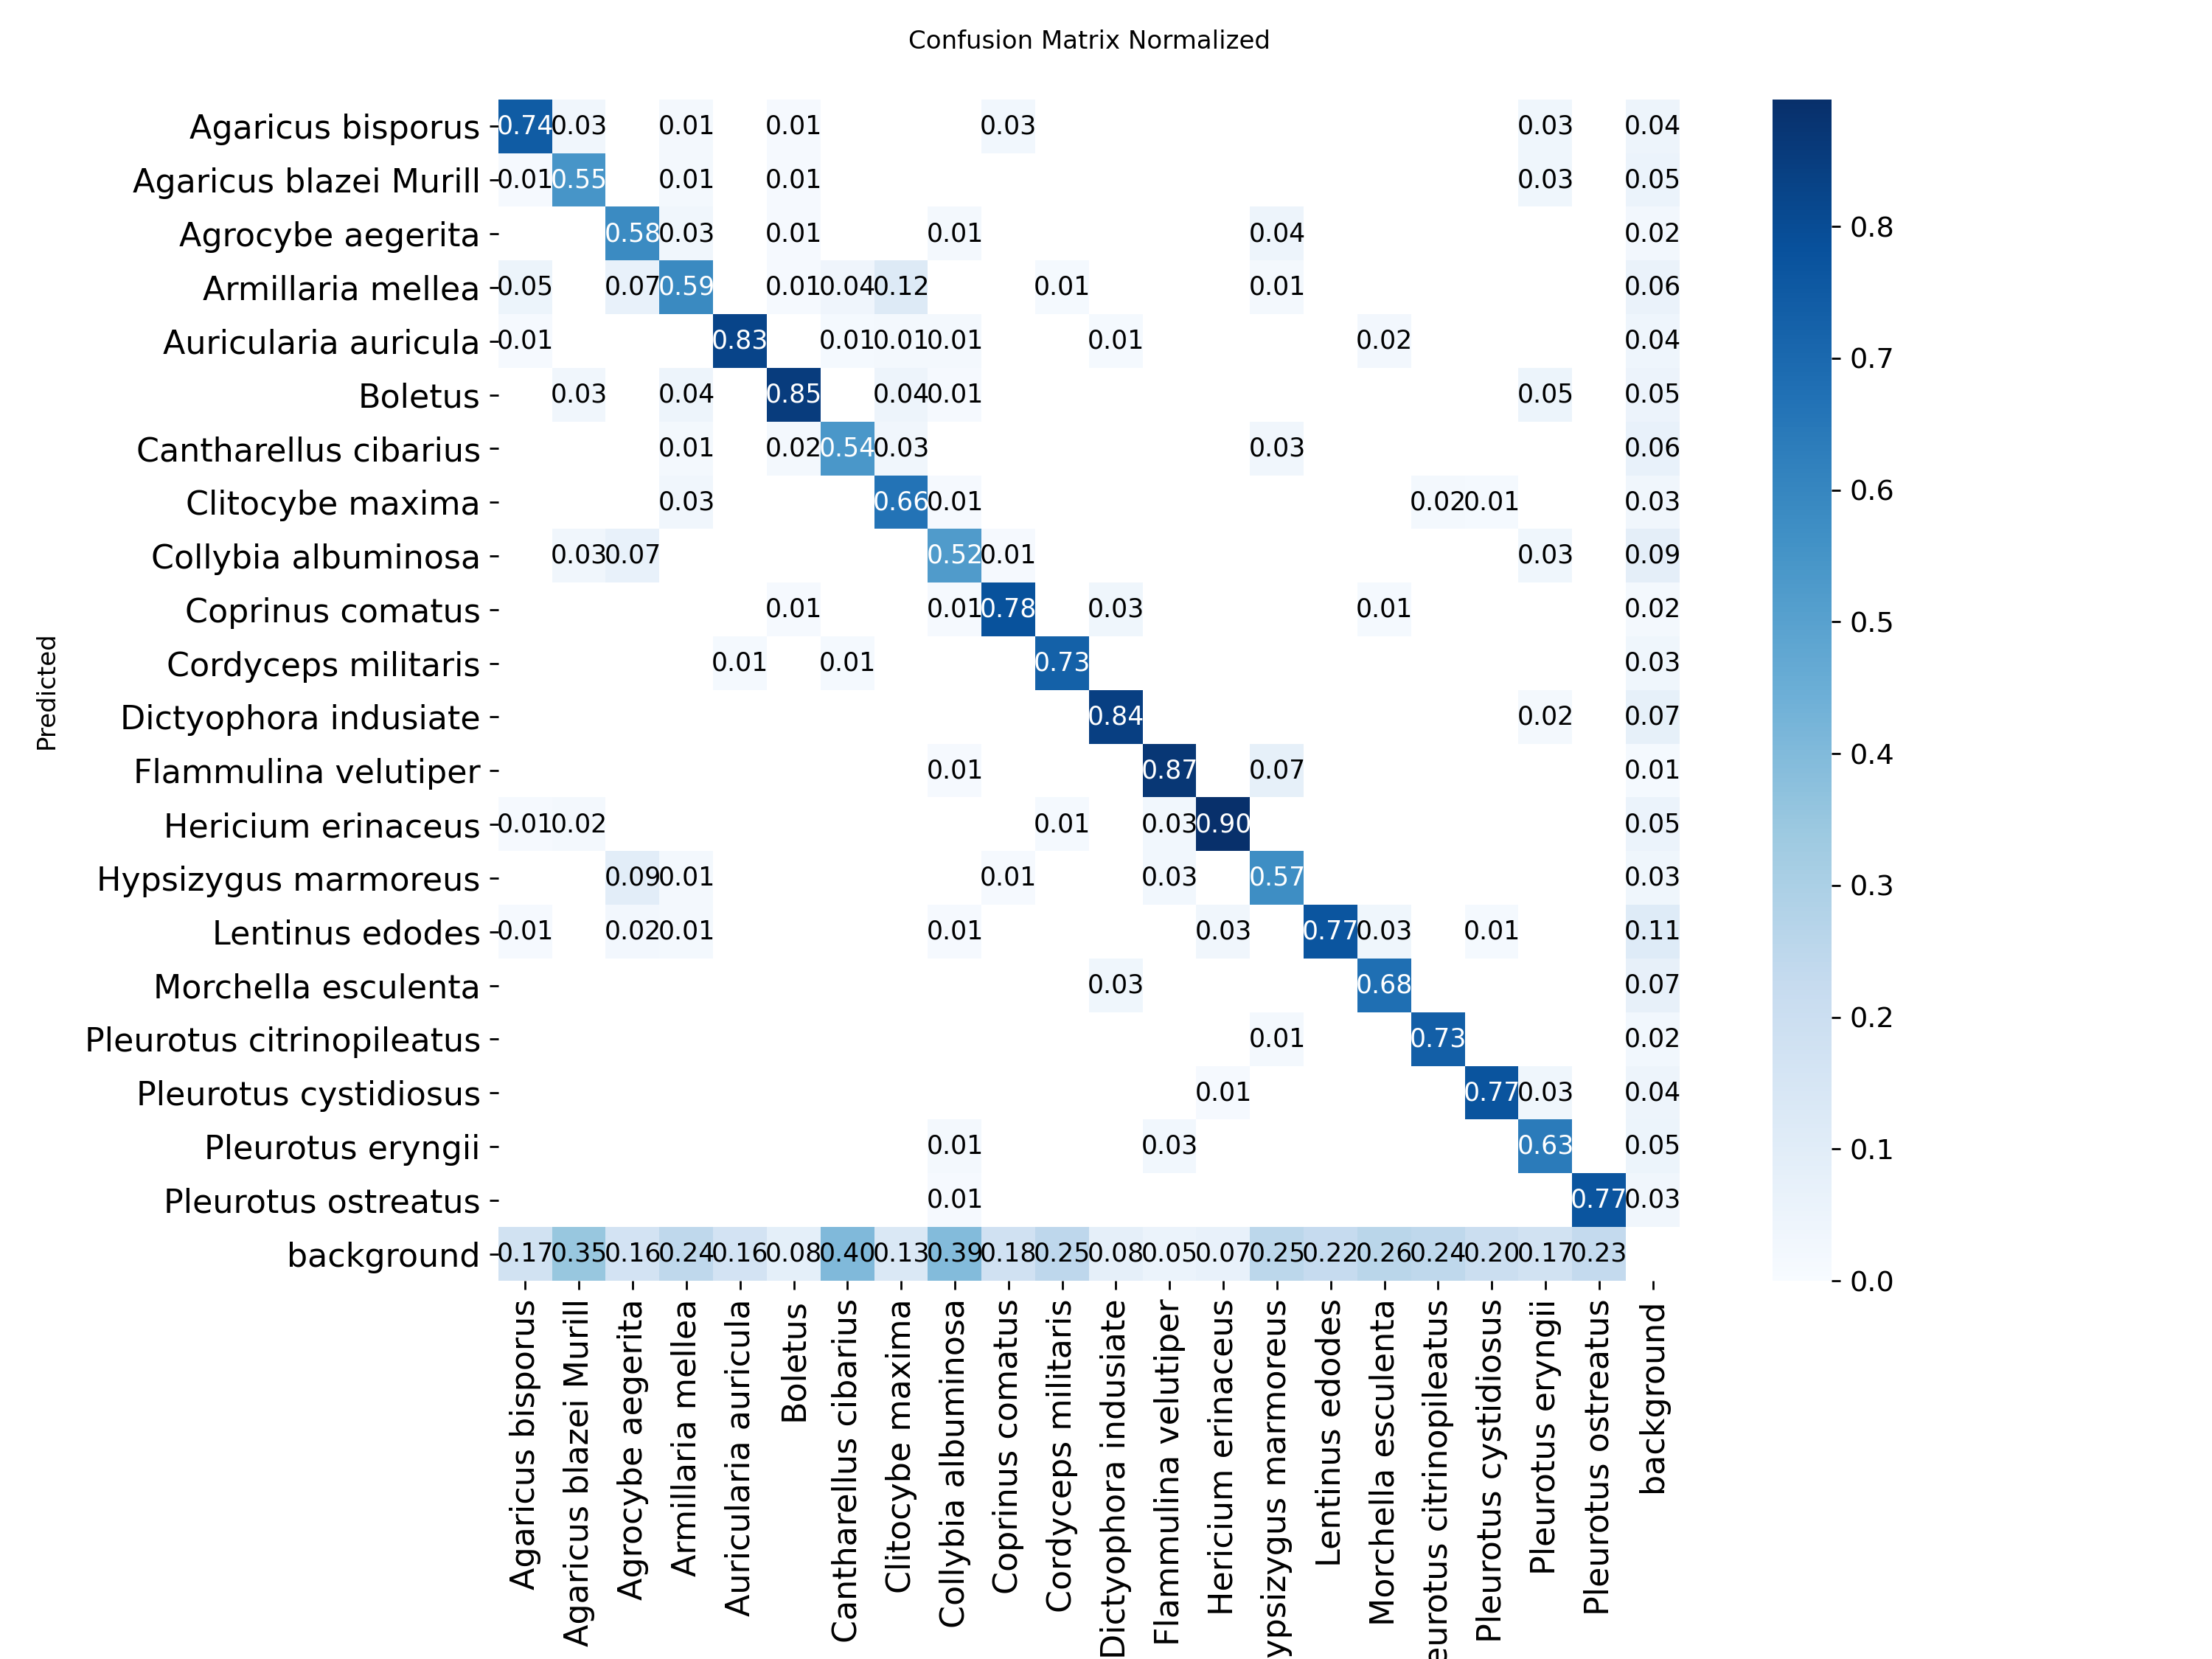

In [ ]:
%matplotlib inline
from PIL import Image

Image.open('C:/Users/User/runs/detect/val4/confusion_matrix_normalized.png')

# Test

In [ ]:
model = YOLO('/Users/allycui/Desktop/SFU Fall2025/IAT 360/Group_Assignment1/best.pt')

results = model.val(data='config.yaml', split='test')

print(f"mAP50-95: {results.box.map:.3f}")
print(f"mAP50:    {results.box.map50:.3f}")
print(f"Precision:{results.box.mp:.3f}")
print(f"Recall:   {results.box.mr:.3f}")


Ultralytics 8.3.221 🚀 Python-3.13.7 torch-2.9.0 CPU (Apple M2)
Model summary (fused): 72 layers, 11,133,711 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.1 ms, read: 142.7±48.6 MB/s, size: 25.6 KB)
val: Scanning /Users/allycui/Desktop/SFU Fall2025/IAT 360/Group_Assignment1/test/labels.cache... 827 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 827/827 1.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 52/52 0.2it/s 4:18
                   all        827       1838      0.716      0.672      0.721      0.576
     Agaricus bisporus         33         79      0.447      0.747      0.678      0.553
Agaricus blazei Murill         28         57      0.612      0.754      0.756      0.603
     Agrocybe aegerita         37         38      0.761      0.868      0.883      0.705
     Armillaria mellea         41         60      0.602      0.567      0.577      0.442
  Auricularia auricula    

# Test(custom60 images)

In [10]:
%%writefile config_custom.yaml
path: /Users/allycui/Desktop/SFU Fall2025/IAT 360/Group_Assignment1

train: /Users/allycui/Desktop/SFU Fall2025/IAT 360/Group_Assignment1/train/images
val: /Users/allycui/Desktop/SFU Fall2025/IAT 360/Group_Assignment1/valid/images
test: /Users/allycui/Desktop/SFU Fall2025/IAT 360/Group_Assignment1/test_customer/images

# Classes
nc: 21 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names: [
  'Agaricus bisporus',
  'Agaricus blazei Murill',
  'Agrocybe aegerita',
  'Armillaria mellea',
  'Auricularia auricula',
  'Boletus',
  'Cantharellus cibarius',
  'Clitocybe maxima',
  'Collybia albuminosa',
  'Coprinus comatus',
  'Cordyceps militaris',
  'Dictyophora indusiate',
  'Flammulina velutiper',
  'Hericium erinaceus',
  'Hypsizygus marmoreus',
  'Lentinus edodes',
  'Morchella esculenta',
  'Pleurotus citrinopileatus',
  'Pleurotus cystidiosus',
  'Pleurotus eryngii',
  'Pleurotus ostreatus'
]

Overwriting config_custom.yaml


In [11]:
model = YOLO('/Users/allycui/Desktop/SFU Fall2025/IAT 360/Group_Assignment1/best.pt')
results_custom = model.val(data='config_custom.yaml', split='test')

print(f"Custom60 mAP50-95: {results_custom.box.map:.3f}")
print(f"Custom60 mAP50:    {results_custom.box.map50:.3f}")
print(f"Custom60 Precision:{results_custom.box.mp:.3f}")
print(f"Custom60 Recall:   {results_custom.box.mr:.3f}")

Ultralytics 8.3.221 🚀 Python-3.13.7 torch-2.9.0 CPU (Apple M2)
Model summary (fused): 72 layers, 11,133,711 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 252.5±213.4 MB/s, size: 68.4 KB)
val: Scanning /Users/allycui/Desktop/SFU Fall2025/IAT 360/Group_Assignment1/test_customer/labels.cache... 63 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 63/63 198.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.2it/s 16.8s
                   all         63        177      0.623      0.519       0.59      0.491
     Agaricus bisporus          3         10        0.8        0.9      0.924      0.906
Agaricus blazei Murill          3         13          1      0.615      0.819      0.753
     Agrocybe aegerita          3         25          0          0     0.0206     0.0142
     Armillaria mellea          3         20          0          0    0.00329   0.000987
  Auricularia auri